# Trabalho Prático nº 1 - Análise de Expressões Faciais em Vídeo
## Tópicos de Ciência dos Dados - MECD (2023/2024)

- Carlos Matos - 2020245868
- Mariana Magueijo - 2020246886

### Parte B

#### 1. Data Spliting e Métricas de Exatidão em Machine Learning

##### 1.1 Data spliting

1.1.1 Train-Test e Train-Validation-Test

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, ConfusionMatrixDisplay
import pandas as pd
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from ReliefF import ReliefF
from skfeature.function.similarity_based import fisher_score
import os
import pickle as pkl
from sklearn.neural_network import MLPClassifier

In [2]:
def train_test(data, target, train_size):
    x_train, x_test, y_train, y_test = train_test_split(data, target, train_size=train_size)
    tt = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]}
    return tt

In [3]:
def train_validation_test(data, target, train_size, test_size):
    x_train, x_rem, y_train, y_rem = train_test_split(data, target, train_size=train_size)
    test_size = test_size/(1 - train_size)
    x_validation, x_test, y_validation, y_test = train_test_split(x_rem, y_rem, train_size=test_size)
    t_validation = {"TRAIN": [x_train, y_train], "TEST": [x_test, y_test], "VALIDATION": [x_validation, y_validation]}
    
    return t_validation

##### 1.1.2 K-Fold

In [4]:
def k_fold(x, y, n_split):
    k = KFold(n_splits=n_split, shuffle=True)
    kfold = []
    for i, j in k.split(x):
        x_train, x_test = x[i], x[j]
        y_train, y_test = y[i], y[j]
        kfold.append({"TRAIN": [x_train, y_train], "TEST": [x_test, y_test]})
    
    return kfold

##### 1.2 Métricas de exatidão

1.2.1 Matriz de confusão

In [5]:
def metrics(y_true, y_pred, labels):
    cm = confusion_matrix(y_true, y_pred)
    r = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    ps = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    fs = f1_score(y_true, y_pred, average='weighted', zero_division=0)
    
    if labels is not None:
        
        try:
            display(pd.DataFrame([r, ps, fs], columns=['Metrics']).rename(index={0: 'Recall', 1: 'Precision', 2: 'F1-score'}))
            cmp = ConfusionMatrixDisplay(cm, display_labels=labels)
            _, ax = plt.subplots(figsize=(5,5))
            cmp.plot(ax=ax)
            ax.set_title("Confusion Matrix")
            ax.set_xlabel("Predicted")
            ax.set_xticklabels(labels, rotation="vertical")
            ax.set_ylabel("True")
            plt.show()

        except:
            display(pd.DataFrame([cm, r, ps, fs], columns=['Metrics']).rename(index={0: 'Confusion Matrix', 1: 'Recall', 2: 'Precision', 3: 'F1-score'}))
    return cm, r, ps, fs

#### 2. K-Nearest Neighbours

##### 2.1 Data set Iris

In [6]:
def dataset_iris():
    iris = datasets.load_iris()
    data = iris["data"]
    target = iris["target"]
    labels = iris["target_names"]
    feature = iris["feature_names"]
    return data, target, labels, feature, iris

In [7]:
array_k = np.array([1, 3, 5, 7, 9, 11, 13, 15])
d, t, l, feat, iris= dataset_iris()

In [8]:
def k_nearest_neighbours(x, y, k):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(x, y)
    return neigh

2.1.1  Train-only

In [9]:
def to_2_1_1(x, y, labels, k):
    neigh = k_nearest_neighbours(x, y, k)
    y_pred = neigh.predict(x)
    y_true = y
    metrics(y_true, y_pred, labels)

------------------ Train-Only ------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


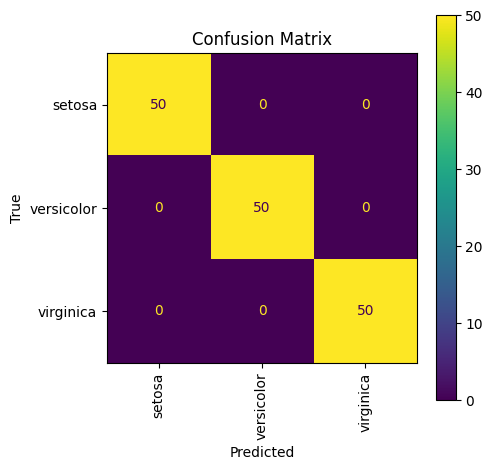

In [10]:
print("------------------ Train-Only ------------------")
to_2_1_1(d, t, l, 1)

2.1.1 TT 70-30

In [11]:
def tt_2_1_1(x, y, labels, k):
    tt = train_test(x, y, 0.7)
    neigh = k_nearest_neighbours(tt["TRAIN"][0], tt["TRAIN"][1], k)
    y_pred = neigh.predict(tt["TEST"][0])
    y_true = tt["TEST"][1]
    metrics(y_true, y_pred, labels)

------------------ Train-Test ------------------


,Metrics
Recall,0.955556
Precision,0.961905
F1-score,0.956095


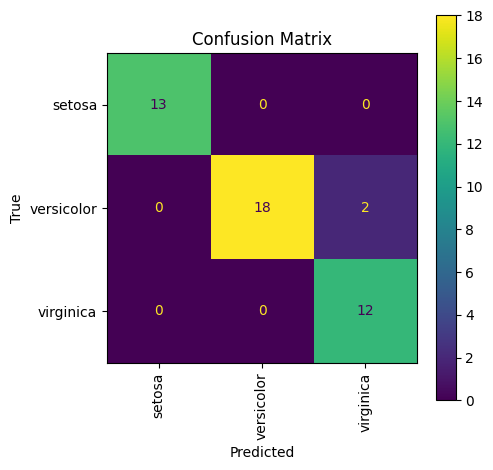

In [12]:
print("------------------ Train-Test ------------------")
tt_2_1_1(d, t, l, 1)

2.1.1  10x10-fold cross-validation (10CV)

In [13]:
def cv_2_1_1(x, y, n_splits, labels, k):
    kfold = k_fold(x, y, n_splits)
    count = 0
    for i in kfold:
        print("-> Iteração " + str(count) + "\n")
        neigh = k_nearest_neighbours(i["TRAIN"][0], i["TRAIN"][1], k)
        y_pred = neigh.predict(i["TEST"][0])
        y_true = i["TEST"][1]
        metrics(y_pred, y_true, labels)
        count += 1

------------------ Cross-Validation ------------------
-> Iteração 0



,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.934473


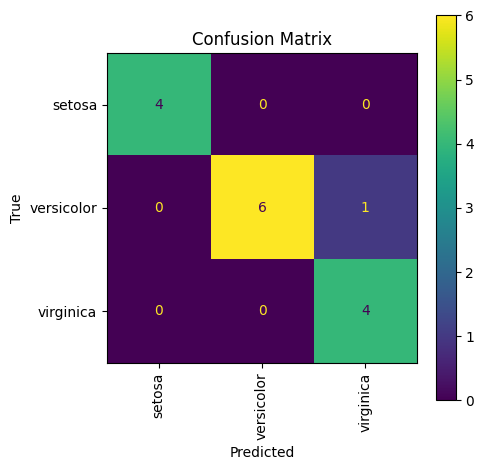

-> Iteração 1



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


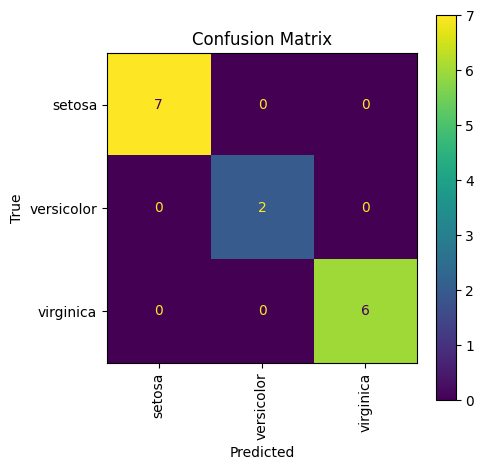

-> Iteração 2



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


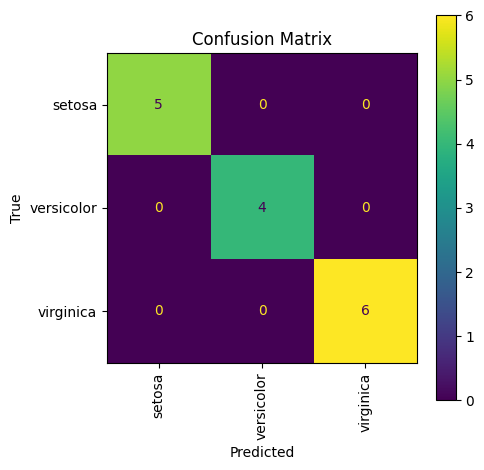

-> Iteração 3



,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.932275


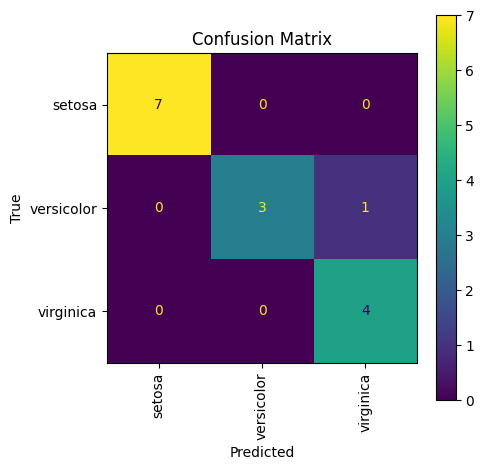

-> Iteração 4



,Metrics
Recall,0.933333
Precision,0.940000
F1-score,0.928421


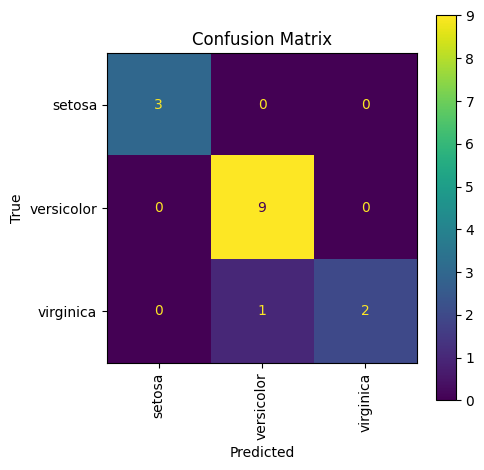

-> Iteração 5



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


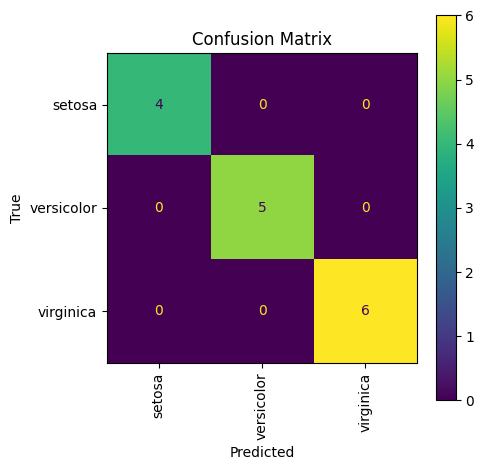

-> Iteração 6



,Metrics
Recall,0.933333
Precision,0.942857
F1-score,0.932194


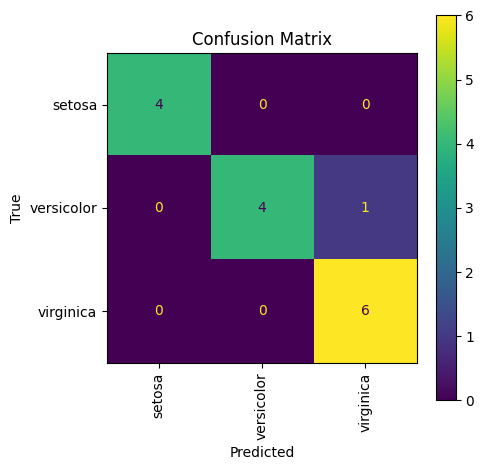

-> Iteração 7



,Metrics
Recall,0.933333
Precision,0.944444
F1-score,0.933800


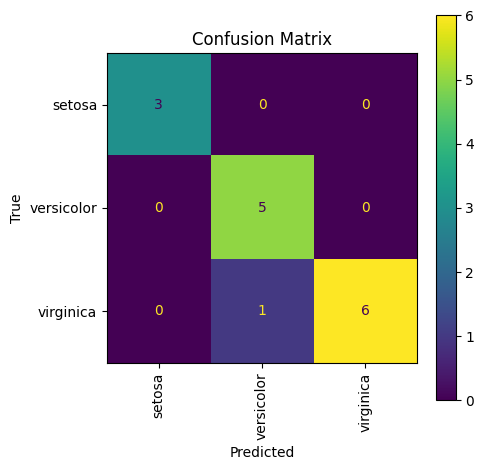

-> Iteração 8



,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


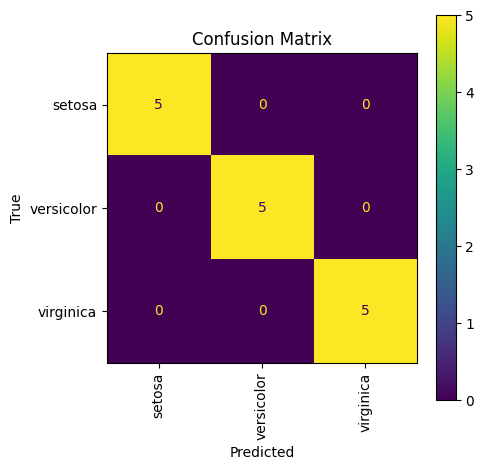

-> Iteração 9



,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.930370


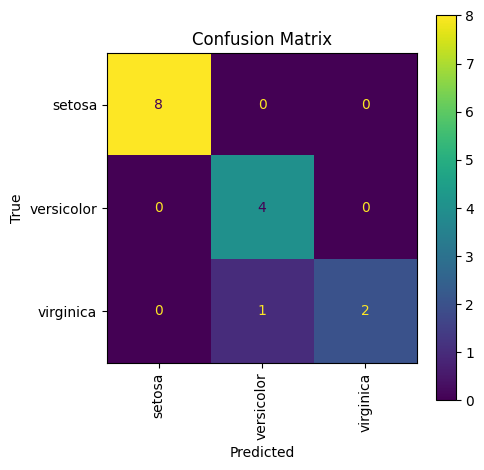

In [14]:
print("------------------ Cross-Validation ------------------")
cv_2_1_1(d, t, 10, l, 1)

2.1.2 Funções auxiliares

In [15]:
def plot_metrics(d_metrics):
    plt.plot(d_metrics["Recall"], label="Recall")
    plt.plot(d_metrics["Precision"], label="Precision")
    plt.plot(d_metrics["F1-score"], label="F1-score")
    plt.title("Metrics Comparison")
    plt.xlabel("K values")
    plt.ylabel("Metrics")
    plt.legend()
    plt.show()

In [16]:
def return_d_metrics(x, y):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        neigh = k_nearest_neighbours(x, y, k)
        y_pred = neigh.predict(x)
        y_true = y
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

2.1.2 Train-Only

In [17]:
def to_2_1_2(x, y, labels, plot):
    d_metrics = return_d_metrics(x, y)
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]

    neigh = k_nearest_neighbours(x, y, best_k)
    y_pred = neigh.predict(x)
    y_true = y
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

------------------ Train-Only ------------------


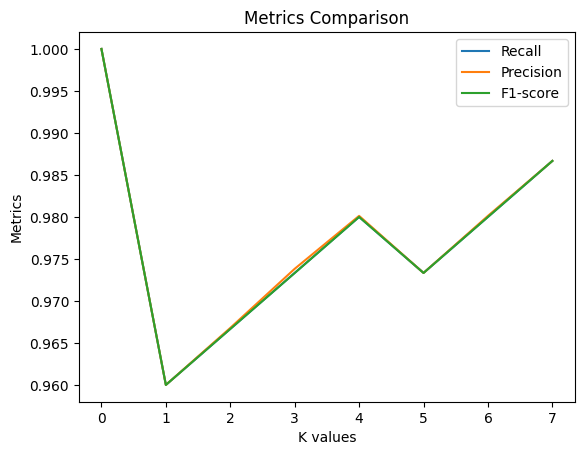

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


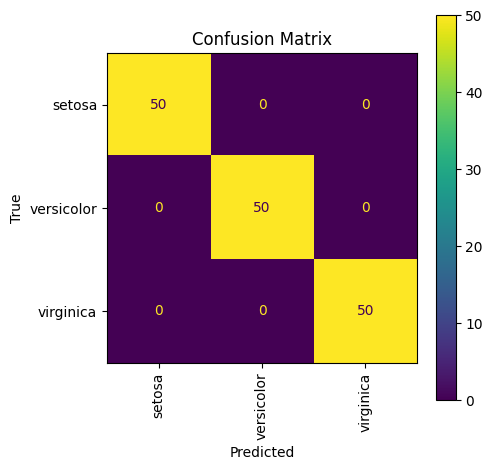

In [18]:
print("------------------ Train-Only ------------------")
to_2_1_2(d, t, l, True)

2.1.2 TVT 40-30-30

In [19]:
def tvt_d_metrics(x, y):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}
    for k in array_k:
        tv = train_validation_test(x, y, 0.4, 0.3)
        neigh = k_nearest_neighbours(tv["TRAIN"][0], tv["TRAIN"][1], k)
        y_pred = neigh.predict(tv["VALIDATION"][0])
        y_true = tv["VALIDATION"][1]
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)
    return d_metrics

In [20]:
def tvt_2_1_2(x, y, labels, plot):
    d_metrics = tvt_d_metrics(x, y)
    
    best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
    tv = train_validation_test(x, y, 0.4, 0.3)
    new_t0 = np.concatenate((tv["TRAIN"][0], tv["VALIDATION"][0]), axis=0)
    new_t1 = np.concatenate((tv["TRAIN"][1], tv["VALIDATION"][1]), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    y_pred = neigh.predict(tv["TEST"][0])
    y_true = tv["TEST"][1]
    if plot:
        plot_metrics(d_metrics)
        print("Best k: " + str(best_k))
        metrics(y_true, y_pred, labels)

------------------ Train-Validation-Test ------------------


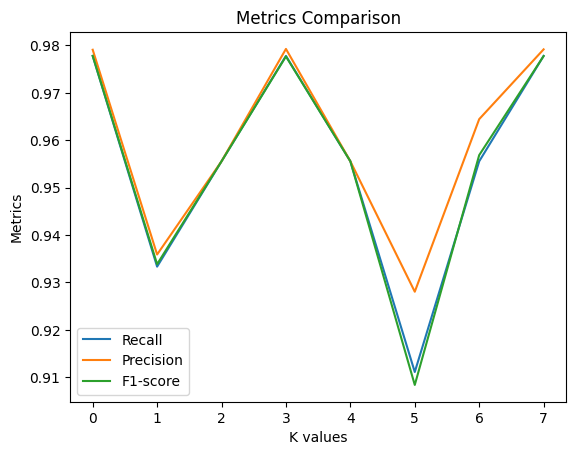

Best k: 1


,Metrics
Recall,0.933333
Precision,0.934360
F1-score,0.933194


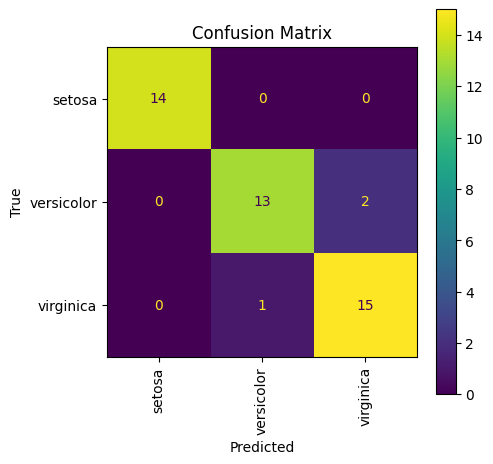

In [21]:
print("------------------ Train-Validation-Test ------------------")
tvt_2_1_2(d, t, l, True)

2.1.2  10x10CV

In [22]:
def cv_d_metrics(kfold):
    d_metrics = {"Recall": [], "Precision": [], "F1-score": []}

    for k in array_k:
        neigh = k_nearest_neighbours(kfold["TRAIN"][0], kfold["TRAIN"][1], k)
        y_pred = neigh.predict(kfold["TEST"][0])
        y_true = kfold["TEST"][1]
        cm, r, ps, fs = metrics(y_true, y_pred, None)
        d_metrics["Recall"].append(r)
        d_metrics["Precision"].append(ps)
        d_metrics["F1-score"].append(fs)

    return d_metrics

In [23]:
def cv_2_1_2(x, y, labels, plot):
    kfold = k_fold(x, y, 10)
    count = 0
    for k in kfold:
        print("-> Iteração " + str(count) + "\n")
        d_metrics = cv_d_metrics(k)
        best_k = array_k[d_metrics["F1-score"].index(max(d_metrics["F1-score"]))]
        neigh = k_nearest_neighbours(k["TRAIN"][0], k["TRAIN"][1], best_k)
        y_pred = neigh.predict(k["TEST"][0])
        y_true = k["TEST"][1]
        
        if plot:
            plot_metrics(d_metrics)
            print("Best k: " + str(best_k))
            metrics(y_true, y_pred, labels)
        count += 1

------------------ Cross-Validation ------------------
-> Iteração 0



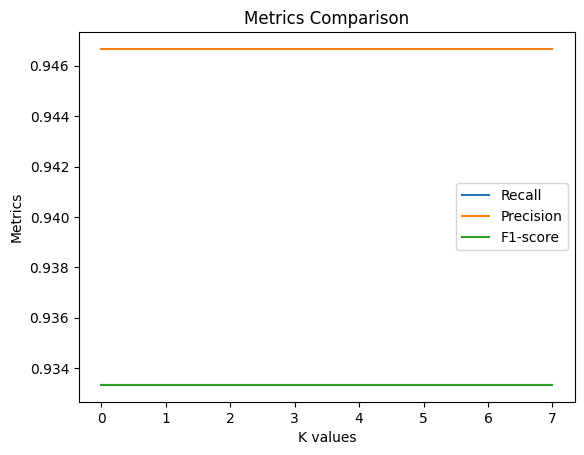

Best k: 1


,Metrics
Recall,0.933333
Precision,0.946667
F1-score,0.933333


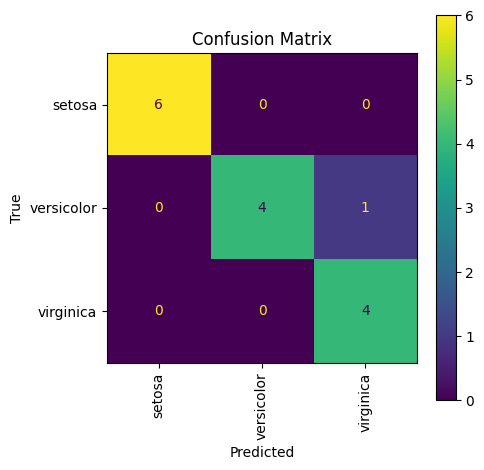

-> Iteração 1



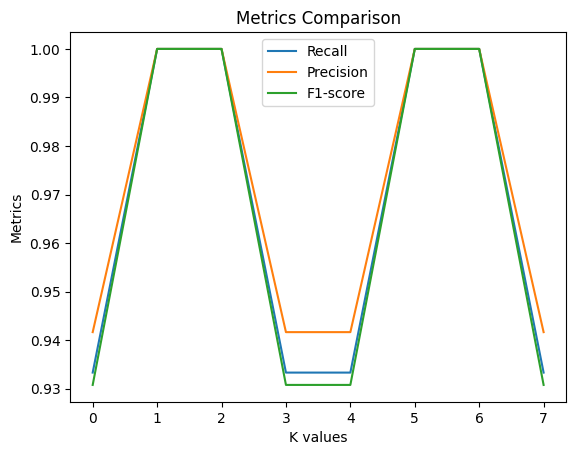

Best k: 3


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


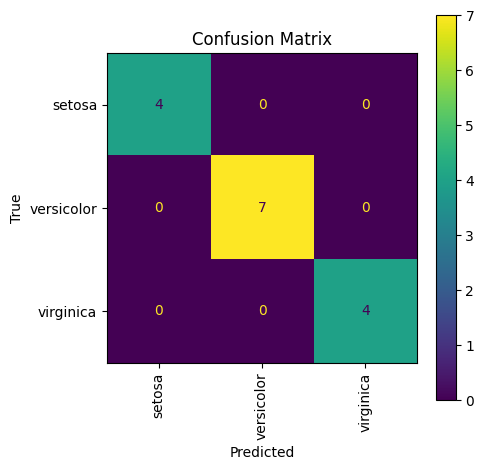

-> Iteração 2



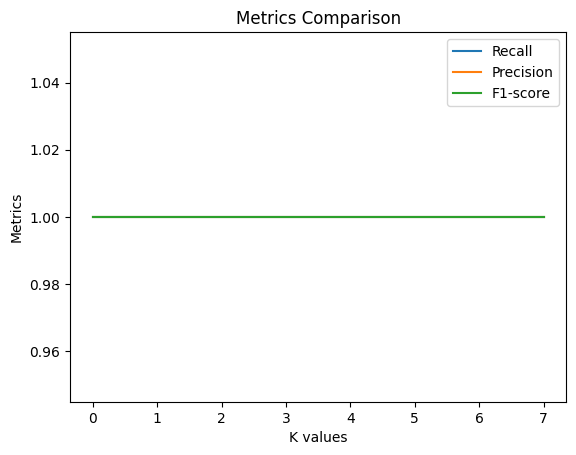

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


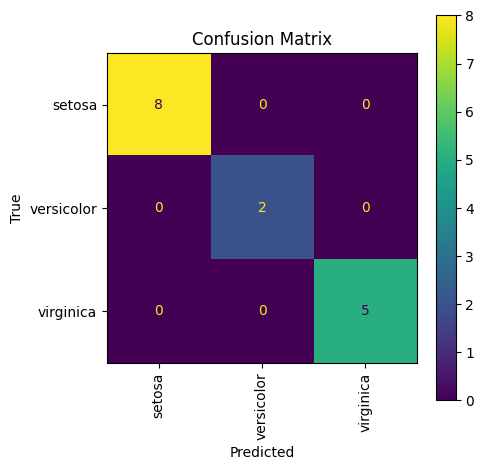

-> Iteração 3



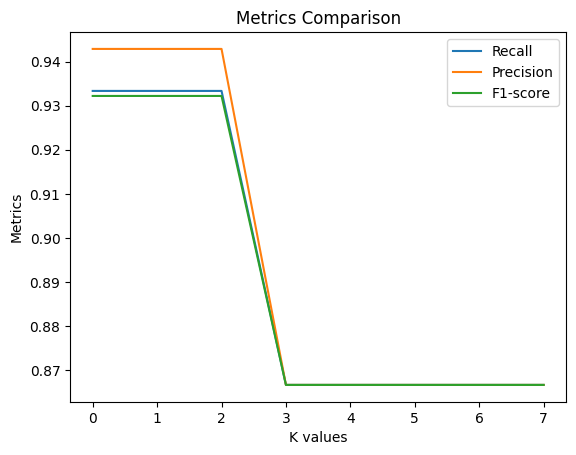

Best k: 1


,Metrics
Recall,0.933333
Precision,0.942857
F1-score,0.932194


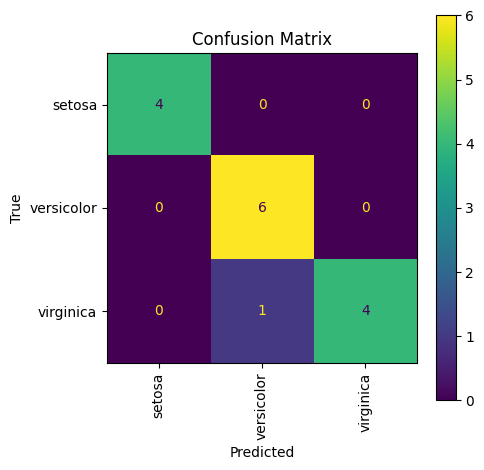

-> Iteração 4



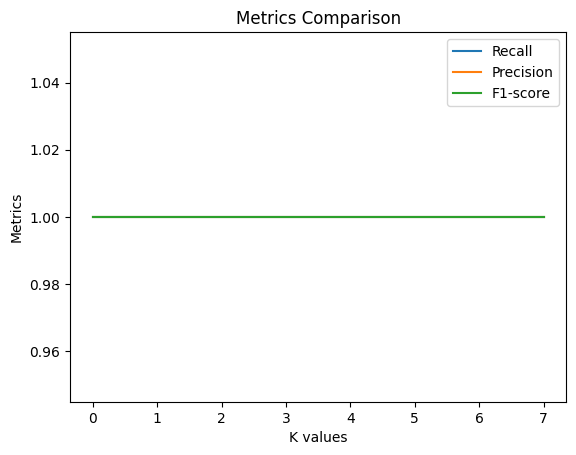

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


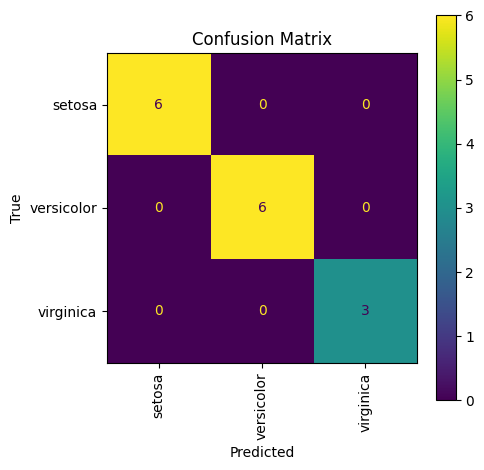

-> Iteração 5



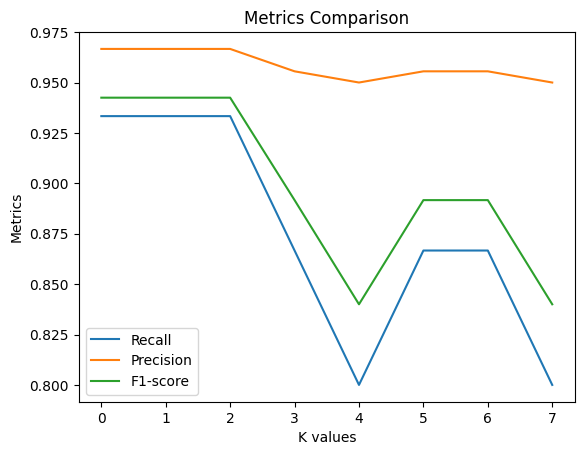

Best k: 1


,Metrics
Recall,0.933333
Precision,0.966667
F1-score,0.942484


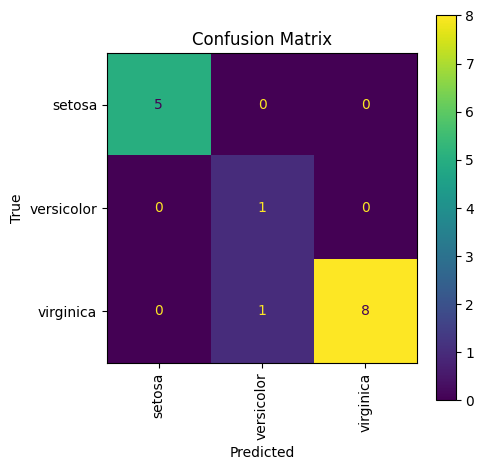

-> Iteração 6



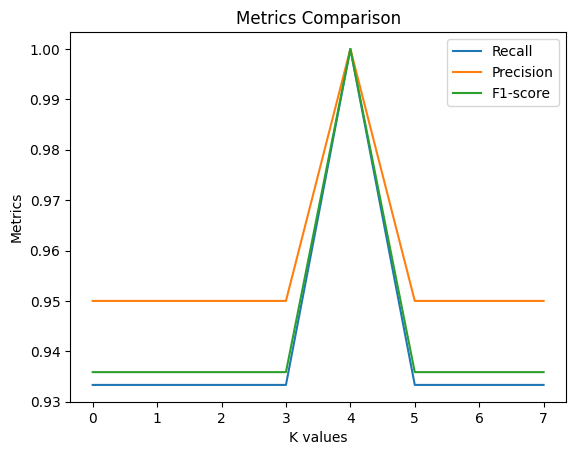

Best k: 9


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


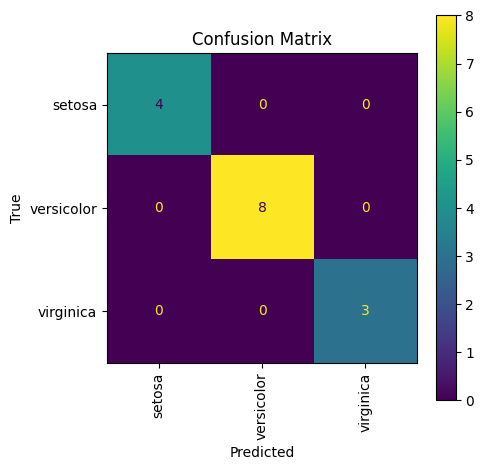

-> Iteração 7



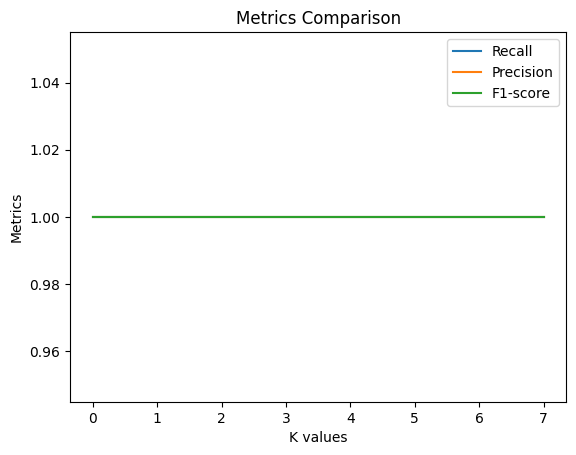

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


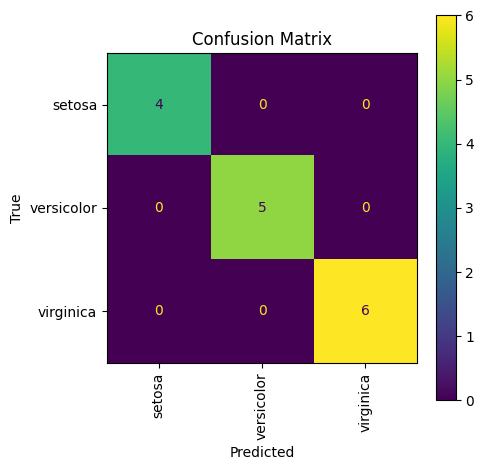

-> Iteração 8



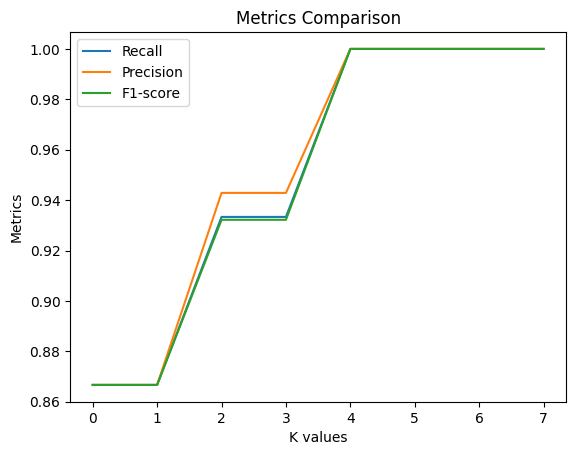

Best k: 9


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


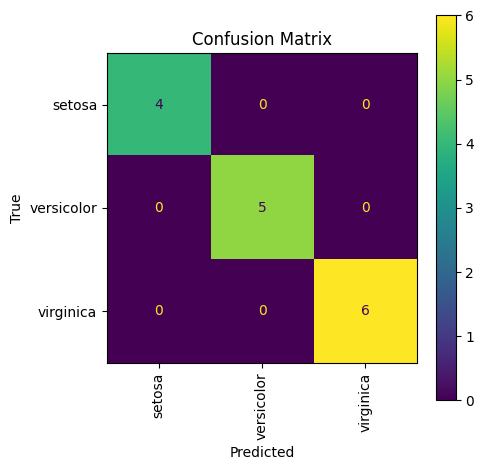

-> Iteração 9



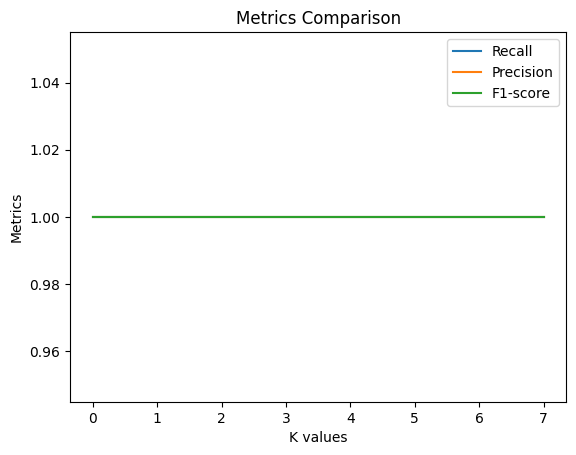

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


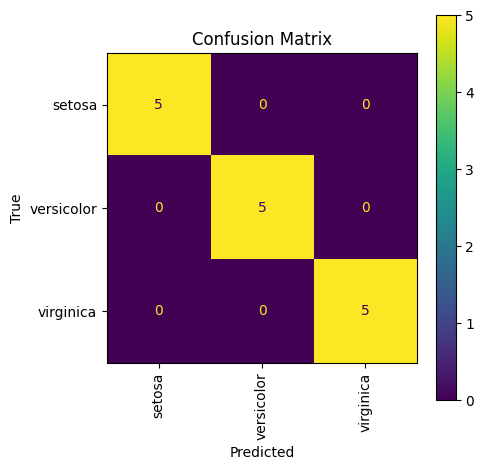

In [24]:
print("------------------ Cross-Validation ------------------")
cv_2_1_2(d, t, l, True)

#### 2.2 Ranking de Features e Modelo Ideal

In [25]:
def reliefF(x, y):
    fs = ReliefF(n_features_to_keep=10)
    fs.fit_transform(x, y)

    return fs.top_features[:10]

2.2.1 Métrica F1-score com critério

In [26]:
def parameters_to_print(f1_aux, f, x_train, x_validation, tv, string_features, i, plot):
    best_k = array_k[f1_aux.index(max(f1_aux))]
    string_features["Number of Features"].append(str(len(f)))
    string_features["Best k"].append(str(best_k))

    new_t0 = np.concatenate((x_train, x_validation), axis=0)
    new_t1 = np.concatenate((tv['TRAIN'][1], tv['VALIDATION'][1]), axis=0)

    neigh = k_nearest_neighbours(new_t0, new_t1, best_k)
    x_test = tv['TEST'][0][:, f]
    y_pred = neigh.predict(x_test)
    y_true = tv['TEST'][1]
    cm, r, ps, fs = metrics(y_true, y_pred, None)
    string_features["F1-score"].append(str(fs))
    if plot:
        for p in string_features:
            print(p + ": " + string_features[p][i])
    return fs, string_features

In [27]:
def plot_features(f1, x_size, y_size):
    plt.figure(figsize=(x_size, y_size))
    plt.plot(f1)
    plt.axis("off")
    plt.show()

In [28]:
def plot_f1_score(f1, x_size, y_size):
    plt.figure(figsize=(x_size, y_size))
    for i in range(len(f1)):
        label = "Feature: " + str(i + 1)
        plt.plot(f1[i], label=label)
    plt.title("F1-score Comparision per Feature")
    plt.xlabel("k values")
    plt.ylabel("F1-score")
    plt.legend()
    plt.show()

In [29]:
def ranking_features(x, y, feat, n_repetitions, plot):
    tv = train_validation_test(x, y, 0.4, 0.3)
    f1 = []
    array_elbow = []
    string_features = {"Number of Features": [], "Best k": [], "F1-score": []}

    for i in range(n_repetitions):
        f1_aux = []
        f = feat[: (i + 1)]
        x_train = tv["TRAIN"][0][:, f]
        x_validation = tv["VALIDATION"][0][:, f]
        for k in array_k:
            neigh = k_nearest_neighbours(x_train, tv["TRAIN"][1], k)
            
            y_pred = neigh.predict(x_validation)
            y_true = tv["VALIDATION"][1]
            cm, r, ps, fs = metrics(y_true, y_pred, None)
            f1_aux.append(fs)
        f1.append(f1_aux)
        if plot: 
            plot_features(f1_aux, 3, 1)
        fs, string_features = parameters_to_print(f1_aux, f, x_train, x_validation, tv, string_features, i, plot)
        array_elbow.append(fs)
    
    return array_elbow, f1, string_features

------------------ Features Ranking ------------------


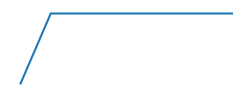

Number of Features: 1
Best k: 3
F1-score: 0.9775661375661375


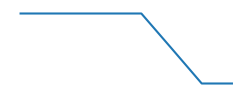

Number of Features: 2
Best k: 1
F1-score: 0.9560185185185184


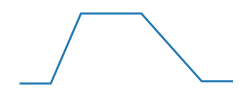

Number of Features: 3
Best k: 5
F1-score: 0.977924169228517


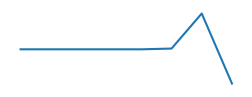

Number of Features: 4
Best k: 13
F1-score: 0.977924169228517


In [30]:
print("------------------ Features Ranking ------------------")
feat = reliefF(d, t)
number_repetitions = 4
f1_score_elbow, f1_score_1, str_print = ranking_features(d, t, feat, number_repetitions, True)

2.2.2 Gráfico do Cotovelo

In [31]:
def plot_elbow(array_elbow):
    index = np.arange(1, len(array_elbow) + 1)
    plt.figure(figsize=(5,5))
    plt.plot(index, array_elbow)
    plt.title("Elbow Graph")
    plt.xlabel("Number of Features")
    plt.ylabel("F1-score")
    plt.show()

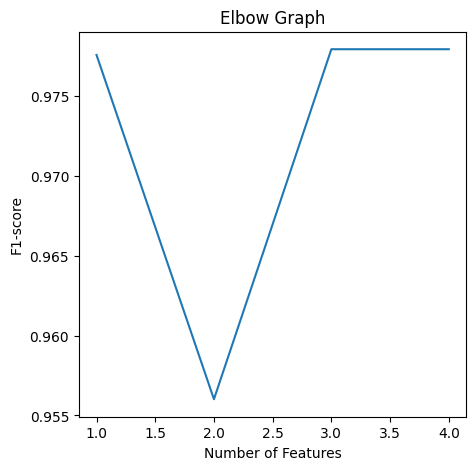

In [32]:
plot_elbow(f1_score_elbow)

2.2.3 Resultados Alcançados

In [33]:
def results(f1, feature):
    label = ['Nº of features: ' + str(i + 1) for i in range(len(feature))]
    col = ['k=' + str(i) for i in array_k]
    df = pd.DataFrame(f1, columns=col, index=label)
    display(df)
    plot_f1_score(f1, 8, 8)

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.912359,0.934218,0.934218,0.934218,0.934218,0.934218,0.934218,0.934218
Nº of features: 2,0.934218,0.934218,0.934218,0.934218,0.934218,0.912359,0.890342,0.890342
Nº of features: 3,0.932775,0.932775,0.977918,0.977918,0.977918,0.956032,0.934218,0.934218
Nº of features: 4,0.955556,0.955556,0.955556,0.955556,0.955556,0.956032,0.977918,0.934218


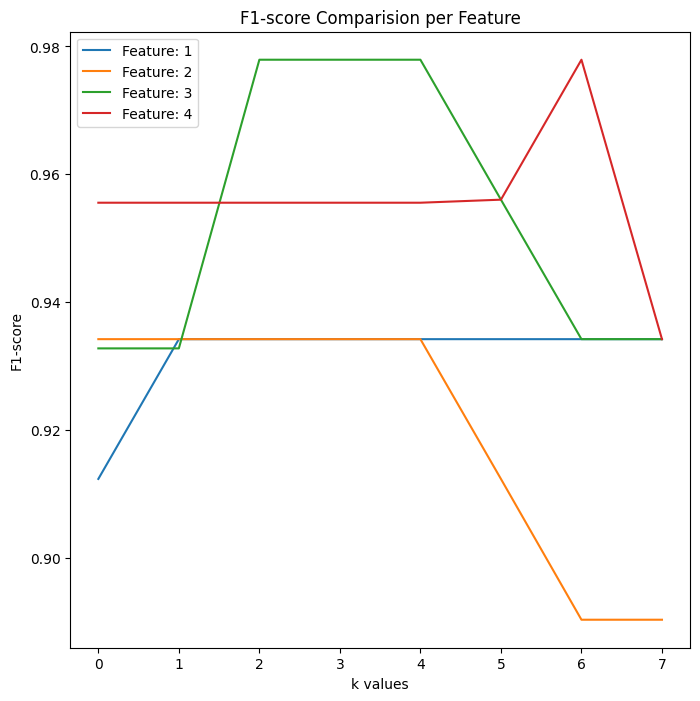

In [34]:
results(f1_score_1, feat)

2.2.4 Resultados modelo ideal à medida que se adicionam features

In [35]:
def ideal_model(str_print, number_repetitions):
    for i in range(number_repetitions):
        for d in str_print:
            print(d + ": " + str_print[d][i])
        print("-" * 30)

In [36]:
ideal_model(str_print, number_repetitions)

Number of Features: 1
Best k: 3
F1-score: 0.9775661375661375
------------------------------
Number of Features: 2
Best k: 1
F1-score: 0.9560185185185184
------------------------------
Number of Features: 3
Best k: 5
F1-score: 0.977924169228517
------------------------------
Number of Features: 4
Best k: 13
F1-score: 0.977924169228517
------------------------------


##### 2.4 Classe iris-versicolor e classe iris-viriginica

In [37]:
def fisherscore(x, y):
    return fisher_score.fisher_score(x, y)

In [38]:
iris_dataframe = pd.DataFrame(d, columns=iris["feature_names"])
iris_dataframe["target"] = iris["target"]
setosa = iris_dataframe[iris_dataframe["target"] == 0]
vesicolor = iris_dataframe[iris_dataframe["target"] == 1].sample(30)
virginica = iris_dataframe[iris_dataframe["target"] == 2].sample(10)
new_iris = pd.concat([setosa, vesicolor, virginica], axis=0)
new_iris_grouped = new_iris.groupby("target").count()
display(new_iris)
display(new_iris_grouped)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
128,6.4,2.8,5.6,2.1,2
100,6.3,3.3,6.0,2.5,2
130,7.4,2.8,6.1,1.9,2
132,6.4,2.8,5.6,2.2,2


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,50,50,50,50
1,30,30,30,30
2,10,10,10,10


------------------ Class Imbalance ------------------


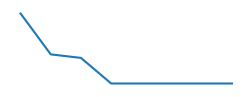

Number of Features: 1
Best k: 1
F1-score: 0.5274691358024692


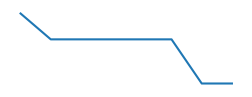

Number of Features: 2
Best k: 1
F1-score: 0.8292448292448292


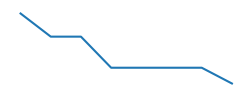

Number of Features: 3
Best k: 1
F1-score: 0.9320987654320987


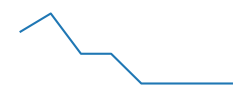

Number of Features: 4
Best k: 3
F1-score: 0.9580246913580246


In [39]:
print("------------------ Class Imbalance ------------------") 


new_iris_data = np.array(new_iris.drop("target", axis=1))
new_iris_target = np.array(new_iris["target"])

feature_fisher = fisherscore(new_iris_data, new_iris_target)

f1_score_elbow, f1_score_2, str_print = ranking_features(new_iris_data, new_iris_target, feature_fisher, number_repetitions, True)


2.4.2 Gráfivo do Cotovelo

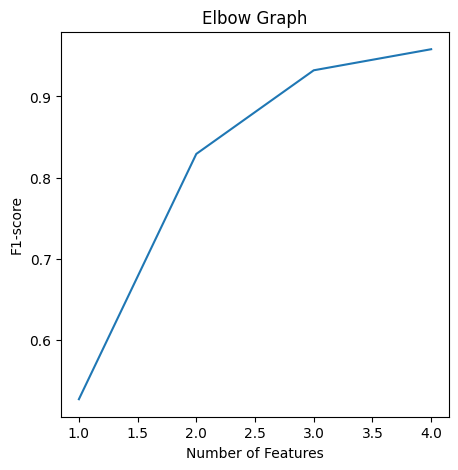

In [40]:
plot_elbow(f1_score_elbow)

2.4.3 Resultados Alcançados

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.743240,0.655693,0.648148,0.593305,0.593305,0.593305,0.593305,0.593305
Nº of features: 2,0.834568,0.791246,0.791246,0.791246,0.791246,0.791246,0.717284,0.717284
Nº of features: 3,0.917284,0.863492,0.863492,0.791246,0.791246,0.791246,0.791246,0.754607
Nº of features: 4,0.917284,0.961292,0.863492,0.863492,0.791246,0.791246,0.791246,0.791246


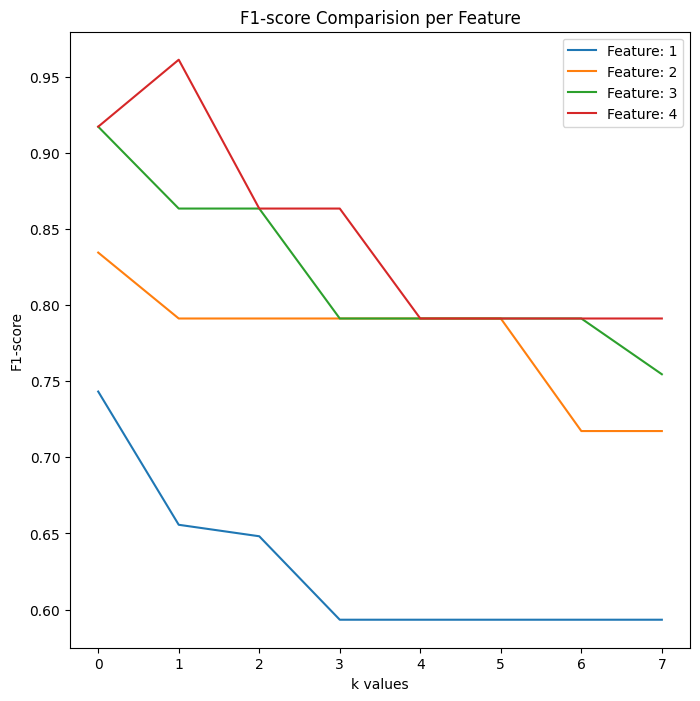

In [41]:
results(f1_score_2, feature_fisher)

2.4.4 Resultados modelo ideal à medida que se adicionam features

In [42]:
ideal_model(str_print, number_repetitions)

Number of Features: 1
Best k: 1
F1-score: 0.5274691358024692
------------------------------
Number of Features: 2
Best k: 1
F1-score: 0.8292448292448292
------------------------------
Number of Features: 3
Best k: 1
F1-score: 0.9320987654320987
------------------------------
Number of Features: 4
Best k: 3
F1-score: 0.9580246913580246
------------------------------


#### 3. Aplicação do ponto 2 no nosso dataset

In [43]:
emotions_name = ["Neutral", "Calm", "Happy", "Sad", "Angry", "Fearful", "Disgust", "Surprised"]

In [58]:
def create_dataframe():
    landmarks = 68
    files = os.listdir("dataset/")

    d = {}

    df_final = None
    done = {"01": [], "02": [], "03": [], "04": [], "05": [], "06": [], "07": [], "08": []}
    for file in files:
        d = {}
        divide = file.split("-")
        emotion = divide[2]
        actor = divide[-1].split(".")[0]
        if actor not in done[emotion]:
            done[emotion].append(actor)
            f = pd.read_csv("dataset/" + file)
            df = pd.DataFrame(f)
            for i in range(landmarks):
                x_land = "x_" + str(i)
                y_land = "y_" + str(i)
                d[x_land] = df[x_land].mean()
                d[y_land] = df[y_land].mean()
            d["emotion"] = emotions_name[int(emotion) - 1]
            if df_final is None:
                df_final = pd.DataFrame([d])
            else:
                df_final = pd.concat([df_final, pd.DataFrame([d])], ignore_index=True)

    return df_final


In [59]:
if os.path.exists("dataframe.pkl"):
    with open("dataframe.pkl", 'rb') as arq:
        df = pkl.load(arq)
else:
    df = create_dataframe()
    with open("dataframe.pkl", 'wb') as arq:
        pkl.dump(df, arq)

display(df)

,x_0,y_0,x_1,y_1,x_2,y_2,x_3,y_3,x_4,y_4,...,y_63,x_64,y_64,x_65,y_65,x_66,y_66,x_67,y_67,emotion
0,479.256122,295.571429,479.818367,339.416327,484.219388,382.962245,490.951020,424.909184,503.239796,465.800000,...,453.195918,680.666327,454.706122,640.481633,458.360204,621.351020,460.224490,604.741837,458.416327,Neutral
1,462.933028,350.588073,467.066972,395.631193,475.288991,439.553211,485.684404,480.951376,502.852294,518.800917,...,498.031193,687.928440,501.000917,657.756881,506.601835,641.267890,508.551376,625.501835,507.316514,Neutral
2,487.913592,312.003883,487.692233,358.868932,491.813592,405.903883,499.776699,451.596117,516.871845,497.076699,...,497.120388,702.852427,502.320388,669.697087,505.648544,650.689320,506.713592,633.344660,503.723301,Neutral
3,495.651515,286.596970,494.503030,335.847475,497.510101,385.597980,503.123232,432.494949,515.752525,474.778788,...,453.887879,680.781818,460.260606,644.634343,462.722222,626.583838,463.035354,609.781818,460.559596,Neutral
4,482.202778,313.806481,484.869444,363.087963,492.240741,412.183333,502.454630,459.598148,518.387037,503.968519,...,487.485185,711.686111,492.372222,670.240741,495.675926,650.576852,497.664815,632.616667,495.675000,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,474.635052,337.676289,478.524742,383.554639,486.597938,429.816495,499.124742,473.172165,520.896907,509.576289,...,459.141237,708.234021,466.255670,684.031959,469.911340,669.008247,472.091753,653.794845,472.404124,Surprised
188,478.157143,364.494286,479.562857,408.887619,486.560952,453.265714,498.435238,495.984762,516.215238,535.561905,...,516.225714,678.346667,522.517143,649.802857,533.440952,631.614286,536.023810,615.277143,533.509524,Surprised
189,462.821698,343.262264,464.033019,392.654717,470.537736,442.616981,481.199057,489.138679,498.672642,530.442453,...,485.001887,699.293396,497.083962,660.514151,499.631132,640.051887,500.883962,621.724528,499.255660,Surprised
190,468.872449,308.700000,468.580612,357.952041,473.829592,409.153061,483.071429,458.719388,500.234694,503.445918,...,464.170408,703.608163,470.836735,663.897959,471.282653,645.322449,473.061224,628.493878,472.052041,Surprised


In [60]:
expressions_data = df.drop("emotion", axis=1).values
expressions_target = df["emotion"].values
expressions_labels = np.array(df["emotion"].unique())

array([479.25612245, 295.57142857, 479.81836735, 339.41632653,
       484.21938776, 382.9622449 , 490.95102041, 424.90918367,
       503.23979592, 465.8       , 524.48265306, 501.86632653,
       550.24489796, 530.79081633, 582.12755102, 552.76836735,
       622.2       , 559.75      , 664.4744898 , 554.1877551 ,
       703.9622449 , 533.71734694, 736.44897959, 505.42142857,
       760.97653061, 470.84693878, 775.12857143, 430.7622449 ,
       781.73673469, 388.44489796, 787.68367347, 344.90102041,
       792.30408163, 300.2       , 499.95612245, 276.90306122,
       517.15714286, 259.15816327, 542.97959184, 253.76632653,
       570.02040816, 256.95408163, 596.39387755, 263.70102041,
       659.68979592, 261.96326531, 688.14591837, 252.88265306,
       714.34795918, 249.69285714, 740.73877551, 253.01632653,
       761.26428571, 266.87857143, 626.62346939, 290.18061224,
       624.70612245, 316.3744898 , 622.45408163, 342.95612245,
       620.17142857, 370.76632653, 592.04285714, 392.50

array(['Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral', 'Neutral',
       'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm',
       'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm',
       'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm', 'Calm',
       'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy', 'Happy',
       'Happy', 'Happy', 'Happy', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad',
       'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad',
       'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad', 'Sad',
       'Sad', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry', 'Angry',
       '

array(['Neutral', 'Calm', 'Happy', 'Sad', 'Angry', 'Fearful', 'Disgust',
       'Surprised'], dtype=object)

3.1.1. Train-only

------------------ Train-Only ------------------


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


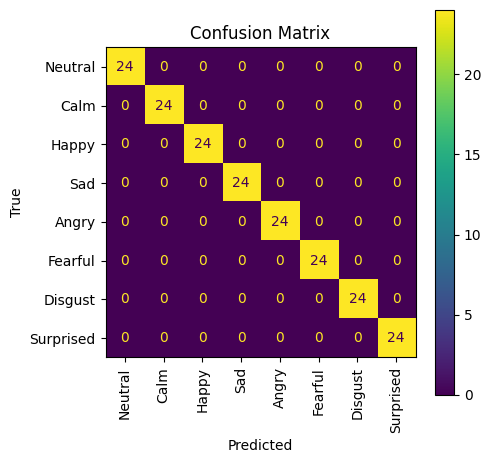

In [66]:
print("------------------ Train-Only ------------------")
to_2_1_1(expressions_data, expressions_target, expressions_labels, 1)

3.1.1. TT 70-30

------------------ Train-Test ------------------


,Metrics
Recall,0.137931
Precision,0.138684
F1-score,0.137072


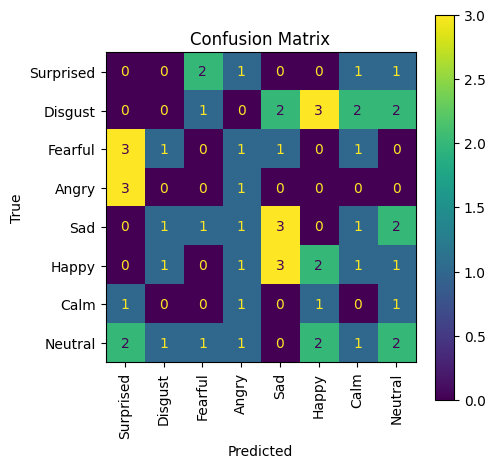

In [49]:
print("------------------ Train-Test ------------------")
tt_2_1_1(expressions_data, expressions_target, expressions_labels, 1)

3.1.1. 10x10-fold cross-validation (10CV)

------------------ Cross-Validation ------------------
-> Iteração 0



,Metrics
Recall,0.200000
Precision,0.257143
F1-score,0.200000


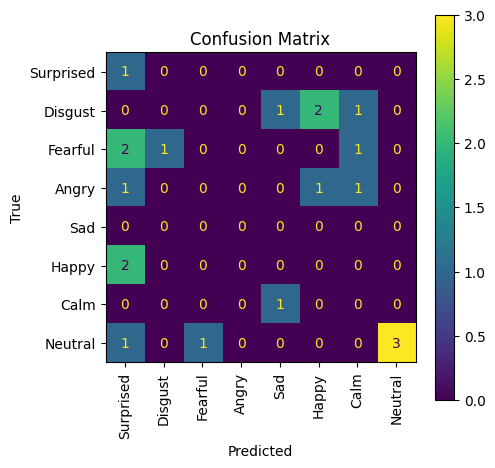

-> Iteração 1



,Metrics
Recall,0.050000
Precision,0.037500
F1-score,0.042857


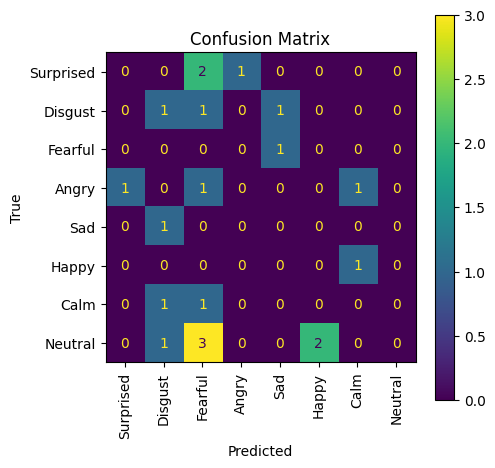

-> Iteração 2



,Metrics
Recall,0.157895
Precision,0.331579
F1-score,0.200919


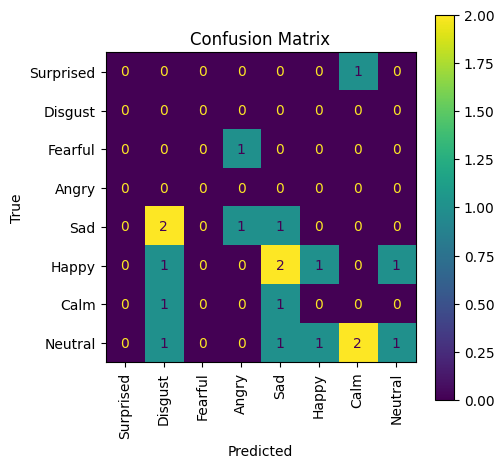

-> Iteração 3



,Metrics
Recall,0.052632
Precision,0.052632
F1-score,0.052632


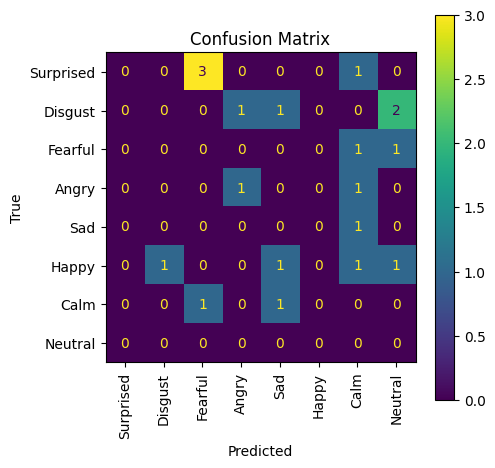

-> Iteração 4



,Metrics
Recall,0.210526
Precision,0.254386
F1-score,0.229741


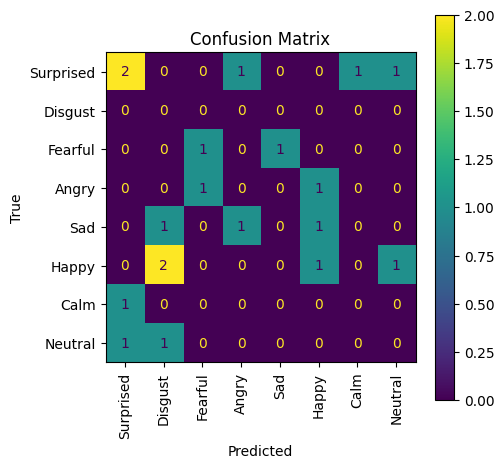

-> Iteração 5



,Metrics
Recall,0.105263
Precision,0.184211
F1-score,0.114035


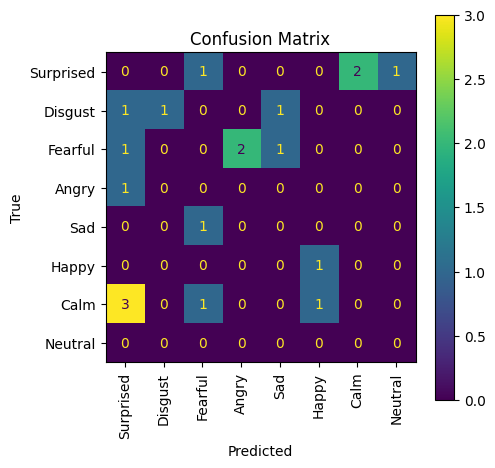

-> Iteração 6



,Metrics
Recall,0.157895
Precision,0.157895
F1-score,0.157895


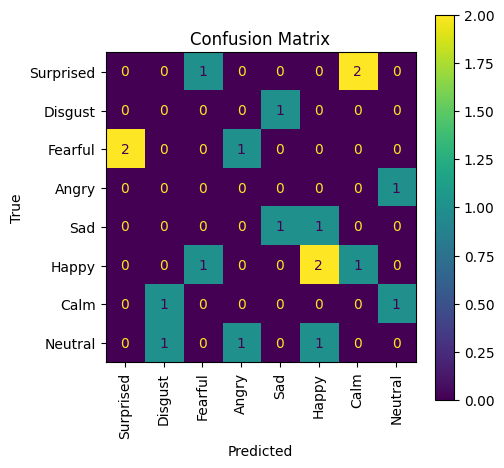

-> Iteração 7



,Metrics
Recall,0.105263
Precision,0.184211
F1-score,0.133333


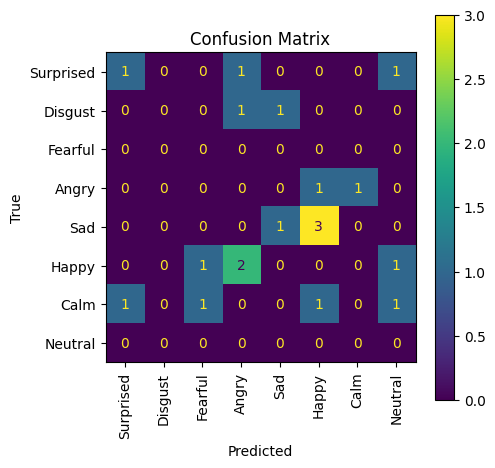

-> Iteração 8



,Metrics
Recall,0.052632
Precision,0.031579
F1-score,0.039474


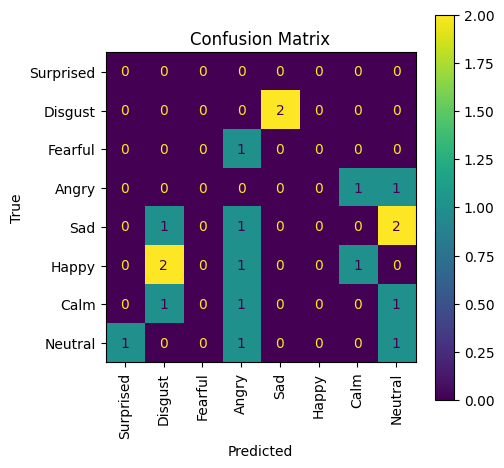

-> Iteração 9



,Metrics
Recall,0.105263
Precision,0.087719
F1-score,0.094737


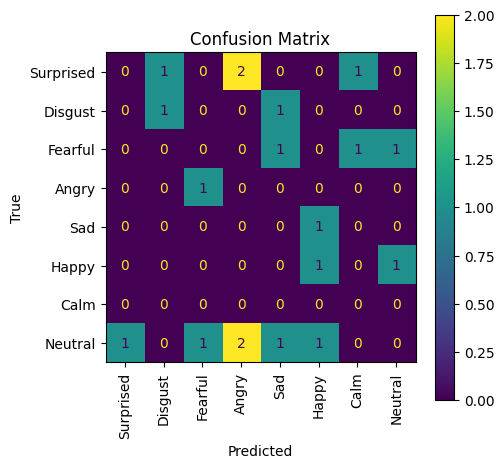

In [ ]:
print("------------------ Cross-Validation ------------------")
cv_2_1_1(expressions_data, expressions_target, 10, expressions_labels, 1)

3.1.2. Train-only

------------------ Train-Only ------------------


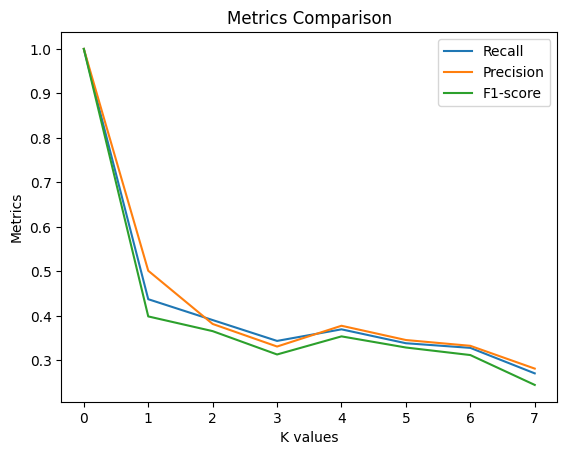

Best k: 1


,Metrics
Recall,1.0
Precision,1.0
F1-score,1.0


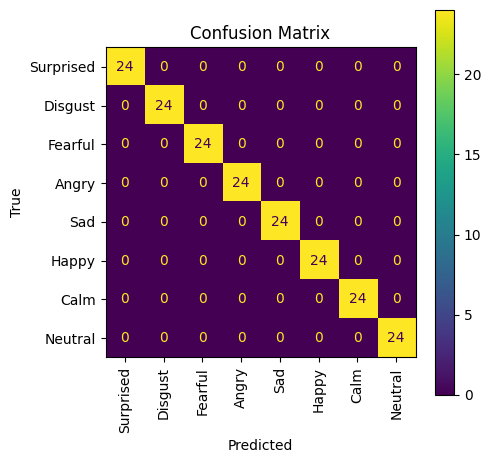

In [ ]:
print("------------------ Train-Only ------------------")
to_2_1_2(expressions_data, expressions_target, expressions_labels, True)

3.1.2. TVT 40-30-30

------------------ Train-Validation-Test ------------------


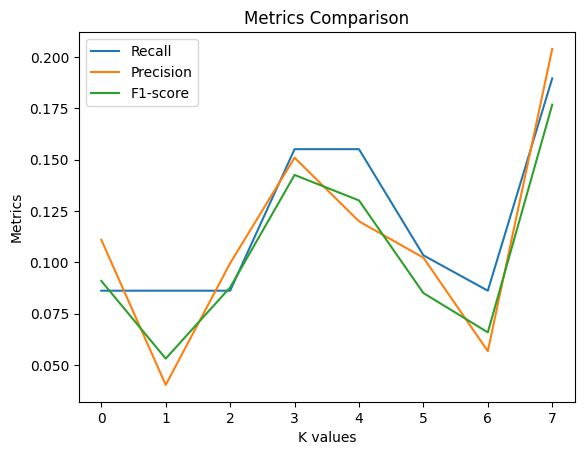

Best k: 15


,Metrics
Recall,0.155172
Precision,0.169209
F1-score,0.150272


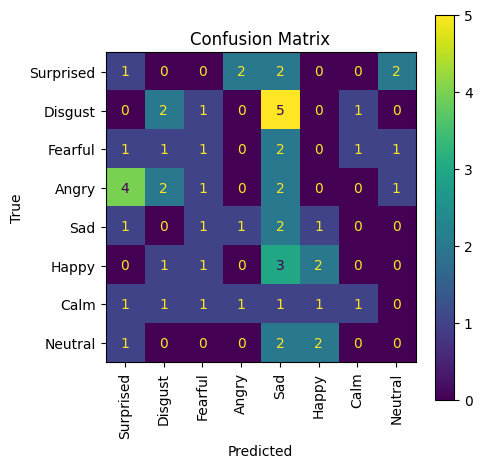

In [ ]:
print("------------------ Train-Validation-Test ------------------")
tvt_2_1_2(expressions_data, expressions_target, expressions_labels, True)

3.1.2. 10x10-fold cross-validation (10CV)

------------------ Cross-Validation ------------------
-> Iteração 0



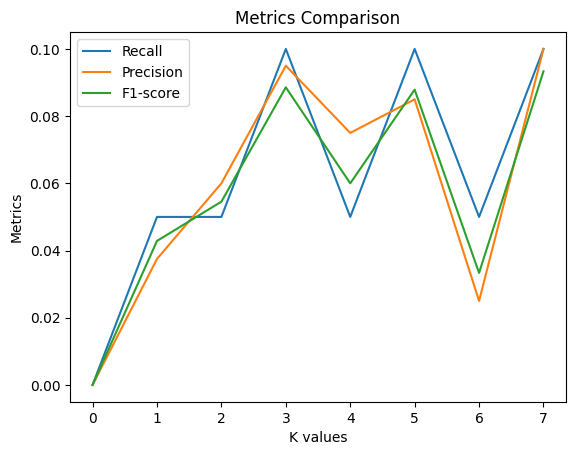

Best k: 15


,Metrics
Recall,0.100000
Precision,0.100000
F1-score,0.093333


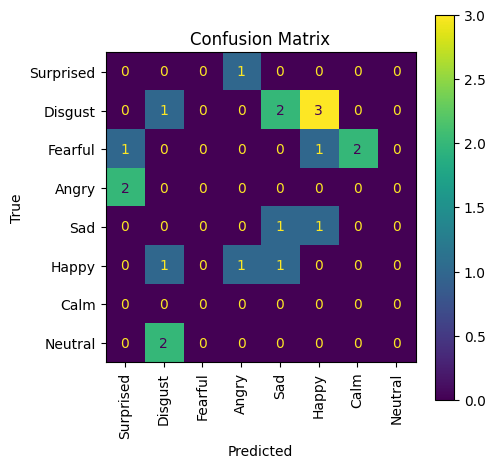

-> Iteração 1



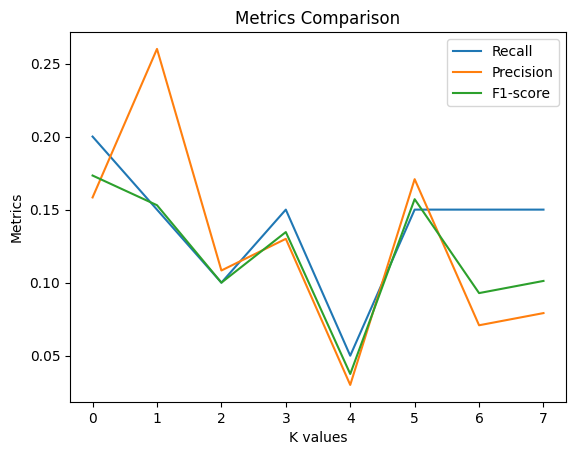

Best k: 1


,Metrics
Recall,0.200000
Precision,0.158333
F1-score,0.173333


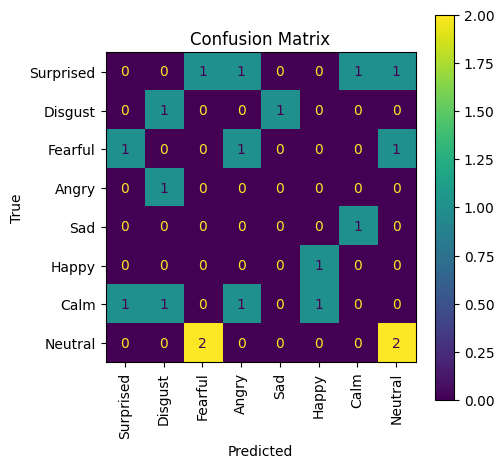

-> Iteração 2



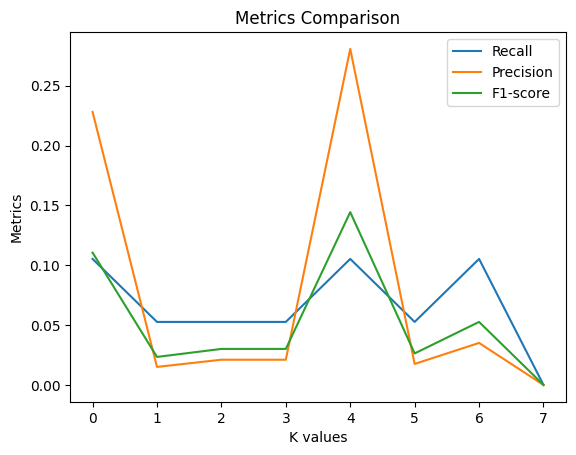

Best k: 9


,Metrics
Recall,0.105263
Precision,0.280702
F1-score,0.144361


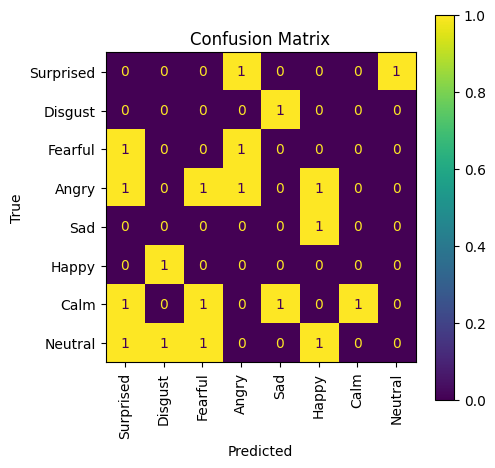

-> Iteração 3



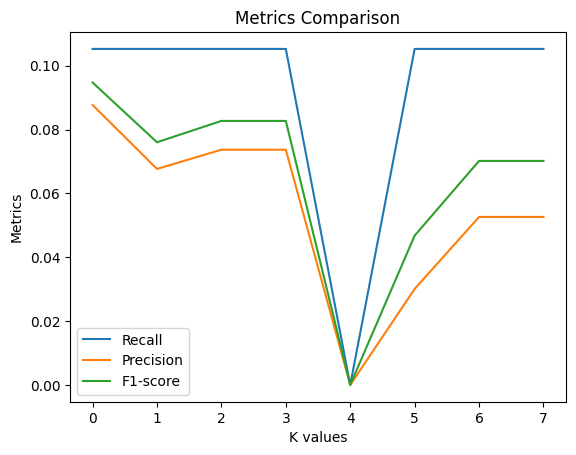

Best k: 1


,Metrics
Recall,0.105263
Precision,0.087719
F1-score,0.094737


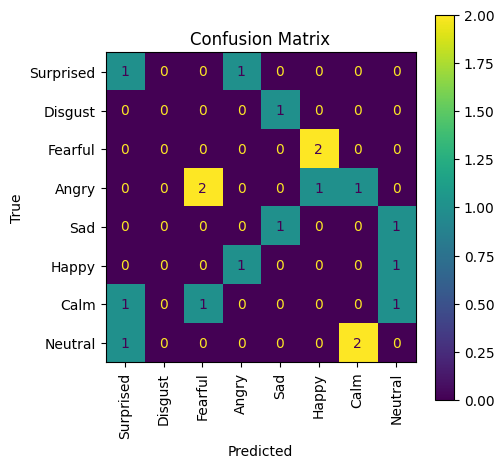

-> Iteração 4



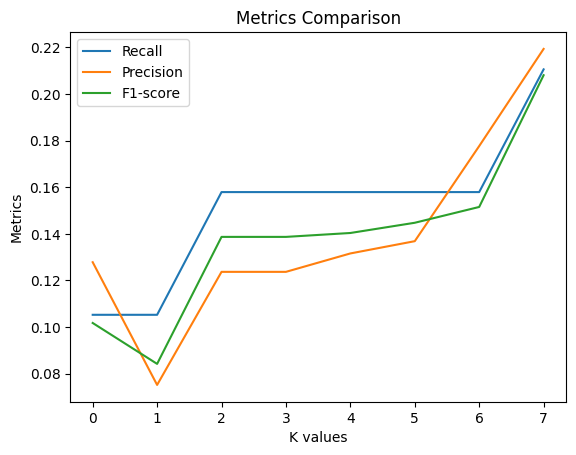

Best k: 15


,Metrics
Recall,0.210526
Precision,0.219298
F1-score,0.208020


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (4,) + inhomogeneous part.

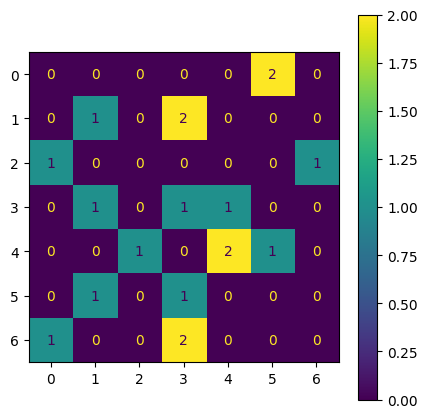

In [ ]:
print("------------------ Cross-Validation ------------------")
cv_2_1_2(expressions_data, expressions_target, expressions_labels, True)

##### 3.2. ReliefF

------------------ Features Ranking ------------------


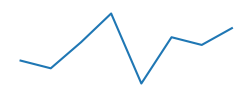

Number of Features: 1
Best k: 7
F1-score: 0.14111758761860183


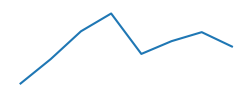

Number of Features: 2
Best k: 7
F1-score: 0.11308316430020283


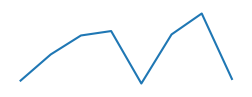

Number of Features: 3
Best k: 13
F1-score: 0.05243757431629013


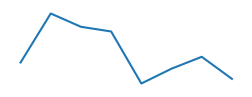

Number of Features: 4
Best k: 3
F1-score: 0.09215181370353784


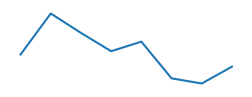

Number of Features: 5
Best k: 3
F1-score: 0.12136789405391944


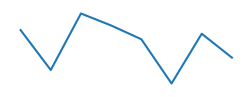

Number of Features: 6
Best k: 5
F1-score: 0.0898719374803913


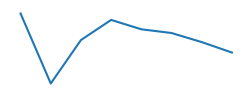

Number of Features: 7
Best k: 1
F1-score: 0.09537156555412132


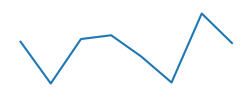

Number of Features: 8
Best k: 13
F1-score: 0.057102858826996755


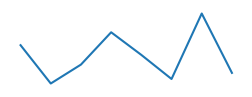

Number of Features: 9
Best k: 13
F1-score: 0.07535247154747748


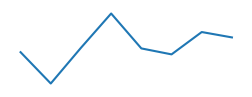

Number of Features: 10
Best k: 7
F1-score: 0.051380559720139926


In [ ]:
print("------------------ Features Ranking ------------------")
feat = reliefF(expressions_data, expressions_target)
number_repetitions = 10
f1_score_elbow, f1_score_3, str_print = ranking_features(expressions_data, expressions_target, feat, number_repetitions, True)

3.2.2 Elbow Graph

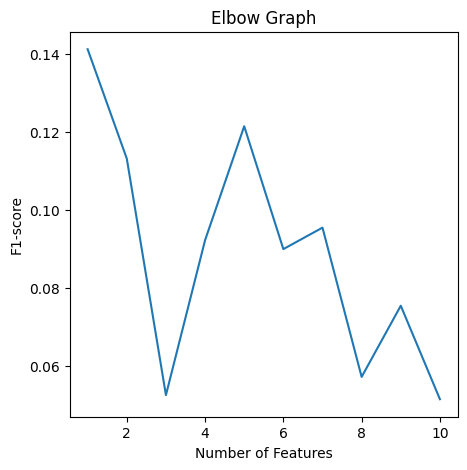

In [ ]:
plot_elbow(f1_score_elbow)

3.2.3 Validação dos Resultados

,k=1,k=3,k=5,k=7,k=9,k=11,k=13,k=15
Nº of features: 1,0.105308,0.099428,0.119262,0.141206,0.087844,0.123120,0.117241,0.130036
Nº of features: 2,0.034222,0.074239,0.119719,0.148867,0.082670,0.103568,0.118305,0.094770
Nº of features: 3,0.094298,0.121132,0.140540,0.145062,0.091342,0.141598,0.163047,0.096003
Nº of features: 4,0.120196,0.171954,0.157902,0.152961,0.098015,0.113670,0.126207,0.102926
Nº of features: 5,0.118560,0.177519,0.149589,0.123277,0.137064,0.084258,0.076842,0.101020
Nº of features: 6,0.159251,0.129918,0.171402,0.162603,0.152488,0.120014,0.156539,0.138999
Nº of features: 7,0.168562,0.100686,0.142850,0.162338,0.153244,0.149642,0.140834,0.130725
Nº of features: 8,0.162362,0.108848,0.165820,0.170686,0.143324,0.110111,0.198562,0.160717
Nº of features: 9,0.162877,0.109803,0.136017,0.180765,0.149400,0.116042,0.206787,0.124514
Nº of features: 10,0.157181,0.111804,0.163530,0.213219,0.162631,0.154000,0.186364,0.178575


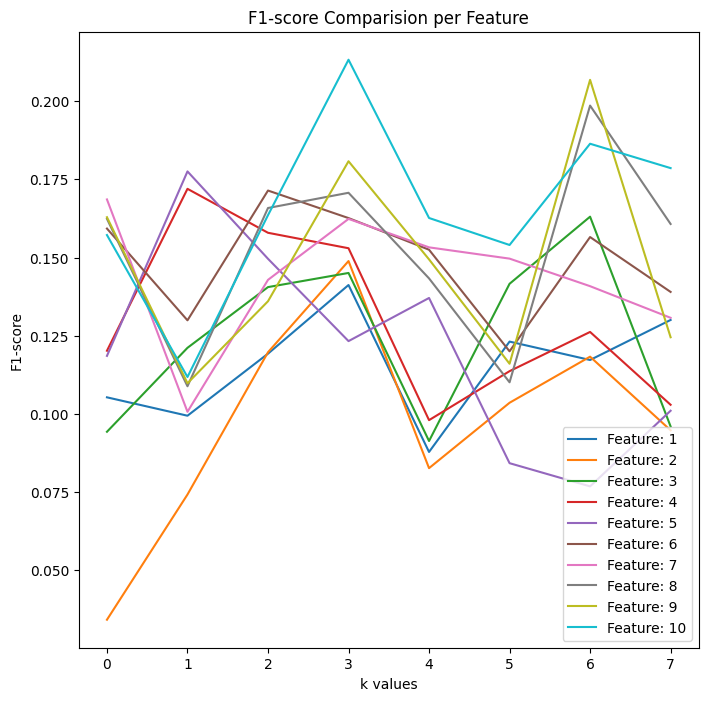

In [ ]:
results(f1_score_3, feat)

3.2.4 Resultados dos Testes

In [ ]:
ideal_model(str_print, number_repetitions)

Number of Features: 1
Best k: 7
F1-score: 0.14111758761860183
------------------------------
Number of Features: 2
Best k: 7
F1-score: 0.11308316430020283
------------------------------
Number of Features: 3
Best k: 13
F1-score: 0.05243757431629013
------------------------------
Number of Features: 4
Best k: 3
F1-score: 0.09215181370353784
------------------------------
Number of Features: 5
Best k: 3
F1-score: 0.12136789405391944
------------------------------
Number of Features: 6
Best k: 5
F1-score: 0.0898719374803913
------------------------------
Number of Features: 7
Best k: 1
F1-score: 0.09537156555412132
------------------------------
Number of Features: 8
Best k: 13
F1-score: 0.057102858826996755
------------------------------
Number of Features: 9
Best k: 13
F1-score: 0.07535247154747748
------------------------------
Number of Features: 10
Best k: 7
F1-score: 0.051380559720139926
------------------------------


#### 4. Rede Neuronal Feedforward

In [ ]:
def best_neuron(array_f1, array_neurons, labels, speed, tv):
    best_f1 = np.argmax(array_f1)
    best_neuron = array_neurons[best_f1]

    print("Best neuron: " + str(best_neuron))

    if speed == "fixed":
        clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=best_neuron, max_iter=2000)
    elif speed == 'variable':
        clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=best_neuron, max_iter=2000)
    else:
        clf = MLPClassifier(activation='logistic', hidden_layer_sizes=best_neuron, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)
    
    x = np.concatenate((tv["TRAIN"][0], tv["VALIDATION"][0]))
    y = np.concatenate((tv["TRAIN"][1], tv["VALIDATION"][1]))

    clf.fit(x, y)
    
    y_pred = clf.predict(tv["TEST"][0])
    y_true = tv['TEST'][1]

    metrics(y_true, y_pred, labels)

In [ ]:
def multi_layer_percepton(data, target, labels, speed):
    tv = train_validation_test(data, target, 0.4, 0.3)
    
    array_neurons = np.arange(5, 500, 5)

    neural_networks = []

    array_f1 = []

    for i in array_neurons:
        if speed == "fixed":
            clf = MLPClassifier(activation='logistic', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        elif speed == 'variable':
            clf = MLPClassifier(activation='logistic', learning_rate='invscaling', solver='sgd', learning_rate_init=0.1, hidden_layer_sizes=i, max_iter=2000)
        else:
            clf = MLPClassifier(activation='logistic', hidden_layer_sizes=i, solver='sgd', learning_rate_init=0.1, momentum=0.5, max_iter=2000)

        neural_networks.append(clf.fit(tv["TRAIN"][0], tv["TRAIN"][1]))

        y_pred = clf.predict(tv["VALIDATION"][0])

        y_true = tv["VALIDATION"][1]

        cm, r, ps, fs = metrics(y_true, y_pred, None)

        array_f1.append(fs)

    best_neuron(array_f1, array_neurons, labels, speed, tv)


------------------ Fixed learning speed------------------
Best neuron: 235


,Metrics
Recall,0.068966
Precision,0.004756
F1-score,0.008899


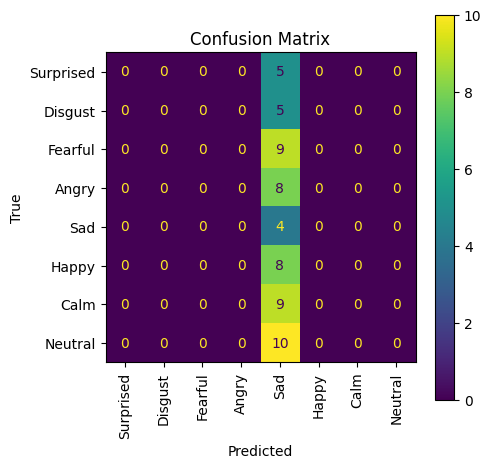

In [ ]:
print("------------------ Fixed learning speed------------------")
multi_layer_percepton(expressions_data, expressions_target, expressions_labels, "fixed")

------------------ Variable learning speed------------------
Best neuron: 350


,Metrics
Recall,0.086207
Precision,0.007432
F1-score,0.013684


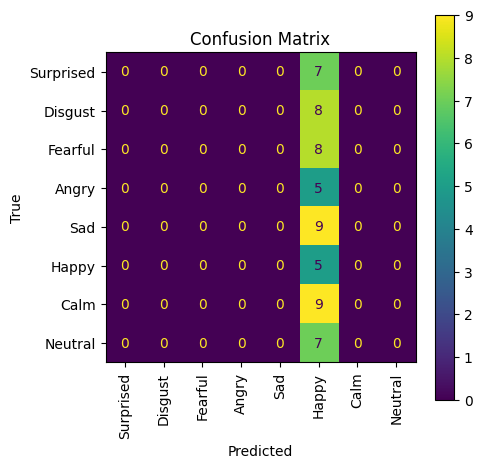

In [ ]:
print("------------------ Variable learning speed------------------")
multi_layer_percepton(expressions_data, expressions_target, expressions_labels, "variable")

------------------ Momentum coeficient------------------
Best neuron: 320


,Metrics
Recall,0.103448
Precision,0.010702
F1-score,0.019397


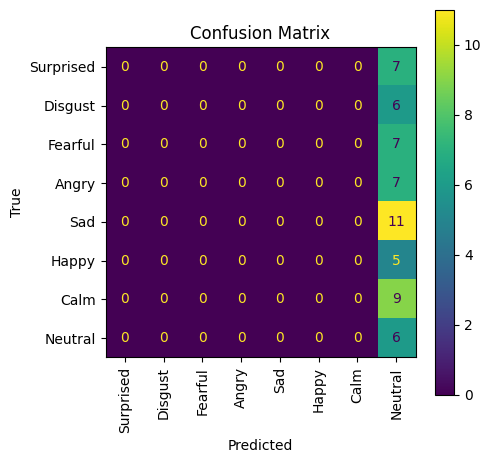

In [ ]:
print("------------------ Momentum coeficient------------------")
multi_layer_percepton(expressions_data, expressions_target, expressions_labels, "momentum")